# EOF of 
- [ ] SST
- [ ] LCC
- [ ] TCC
- [ ] SSH
- [ ] EKE
- [ ] Winds
- [ ] SW/LW/SH/LH

In [1]:
import xarray as xr
import json
import gcsfs
import numpy as np
import cmocean
import cartopy.crs as ccrs #cartopy coord ref sys
import cartopy
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
from eofs.xarray import Eof as eof

In [15]:
def open_ds(filename):
    ds = xr.open_dataset(f'/work5/stb/ERA5/{filename}.nc', chunks={'time': 69033})
    return ds

In [17]:
sst_ds = open_ds('sst')
tcc_ds = open_ds('tcc')
mslp_ds = open_ds('mslp')
u10_ds = open_ds('u10')
v10_ds = open_ds('v10')
mask_ds = open_ds('mask')
lcc_ds = open_ds('lcc')

In [18]:
sst = sst_ds.sea_surface_temperature.resample(time='1D').mean()#.sel(**time_slice)
tcc = tcc_ds.total_cloud_cover.resample(time='1D').mean()#.sel(**time_slice)
mslp = mslp_ds.mean_sea_level_pressure.resample(time='1D').mean()#.sel(**time_slice)
u10 = u10_ds['10m_u_component_of_wind'].resample(time='1D').mean()#.sel(**time_slice)
v10 = v10_ds['10m_v_component_of_wind'].resample(time='1D').mean()#.sel(**time_slice)
mask = mask_ds.land_sea_mask
lcc = lcc_ds.lcc.resample(time='1D').mean()#.sel(**time_slice)

In [19]:
sst

<xarray.DataArray 'sea_surface_temperature' (time: 23011, latitude: 55,
                                             longitude: 69)> Size: 349MB
dask.array<transpose, shape=(23011, 55, 69), dtype=float32, chunksize=(5752, 55, 69), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 220B 31.0 30.75 30.5 30.25 ... 18.0 17.75 17.5
  * longitude  (longitude) float32 276B 262.0 262.2 262.5 ... 278.5 278.8 279.0
  * time       (time) datetime64[ns] 184kB 1959-01-01 1959-01-02 ... 2021-12-31

In [20]:
from dask.distributed import Client

client = Client("tcp://140.208.147.165:40069")
client

<Client: 'tcp://140.208.147.165:40069' processes=8 threads=8, memory=44.72 GiB>

In [21]:
solver = eof(sst)

In [23]:
solver

In [22]:
eofs = solver.eofs(neofs=3)

In [24]:
eofs

<xarray.DataArray 'eofs' (mode: 3, latitude: 55, longitude: 69)> Size: 46kB
array([[[        nan,         nan,         nan, ...,         nan,
         -0.03731564, -0.03521486],
        [        nan,         nan,         nan, ...,         nan,
         -0.03571955, -0.03301829],
        [        nan,         nan,         nan, ...,         nan,
         -0.03330232, -0.03042373],
        ...,
        [        nan,         nan,         nan, ..., -0.00552236,
         -0.0055705 , -0.00564764],
        [        nan,         nan,         nan, ..., -0.00522782,
         -0.00523621, -0.00528255],
        [        nan,         nan,         nan, ..., -0.00495074,
         -0.00494171, -0.0049525 ]],

       [[        nan,         nan,         nan, ...,         nan,
          0.04572245,  0.03224594],
        [        nan,         nan,         nan, ...,         nan,
          0.03870006,  0.02468058],
        [        nan,         nan,         nan, ...,         nan,
          0.02868573,  0.01584652],
...
        [        nan,         nan,         nan, ..., -0.01815898,
         -0.01823151, -0.01819377],
        [        nan,         nan,         nan, ..., -0.0183309 ,
         -0.0185221 , -0.01846445],
        [        nan,         nan,         nan, ..., -0.01827368,
         -0.01852232, -0.01848367]],

       [[        nan,         nan,         nan, ...,         nan,
         -0.01098463, -0.00434817],
        [        nan,         nan,         nan, ...,         nan,
         -0.01121886, -0.00263774],
        [        nan,         nan,         nan, ...,         nan,
         -0.00788147,  0.00062914],
        ...,
        [        nan,         nan,         nan, ..., -0.01917035,
         -0.01856926, -0.0181107 ],
        [        nan,         nan,         nan, ..., -0.01967765,
         -0.01915621, -0.01882795],
        [        nan,         nan,         nan, ..., -0.02022422,
         -0.0196744 , -0.01930978]]], dtype=float32)
Coordinates:
  * mode       (mode) int64 24B 0 1 2
  * latitude   (latitude) float32 220B 31.0 30.75 30.5 30.25 ... 18.0 17.75 17.5
  * longitude  (longitude) float32 276B 262.0 262.2 262.5 ... 278.5 278.8 279.0
Attributes:
    long_name:  empirical_orthogonal_functions

In [34]:
variance_fractions = solver.varianceFraction(neigs=3)

In [36]:
variance_fractions

<xarray.DataArray 'variance_fractions' (mode: 3)> Size: 12B
array([0.95301837, 0.01577361, 0.00646208], dtype=float32)
Coordinates:
  * mode     (mode) int64 24B 0 1 2
Attributes:
    long_name:  variance_fractions

In [35]:
pc = solver.pcs(npcs=3)

In [37]:
pc

<xarray.DataArray 'pcs' (time: 23011, mode: 3)> Size: 276kB
array([[156.92639  , -11.736214 ,   1.3262331],
       [161.79779  , -11.523042 ,   1.0418243],
       [166.75787  , -11.2619095,   0.802057 ],
       ...,
       [ 62.195072 , -13.048689 ,   1.9888512],
       [ 55.94525  ,  -8.499609 ,   1.495006 ],
       [ 49.889503 ,  -4.7439685,   1.133823 ]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 184kB 1959-01-01 1959-01-02 ... 2021-12-31
  * mode     (mode) int64 24B 0 1 2

In [ ]:
def eof_func(data):
    # this sets it up
    solver = eof(data) # data with a time vector
    # compute the EOF
    eofs = solver.eofs(neofs=3)
    # variance explained
    variance_fractions = solver.varianceFraction(neigs=3) # number eigenvalues
    # principal component
    pc = solver.pcs(npcs=3)

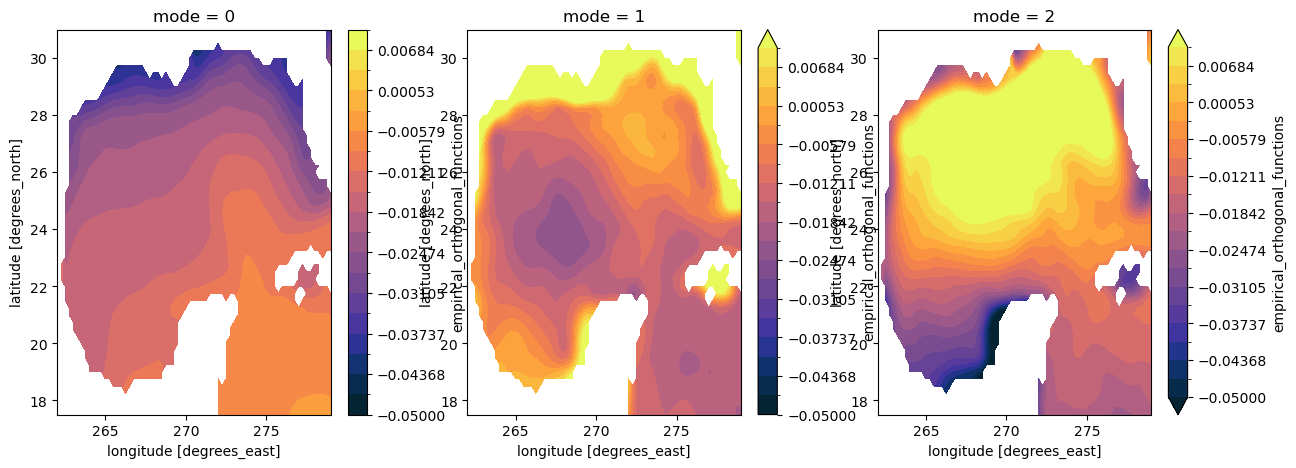

In [42]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
eofs.isel(mode=0).plot.contourf(levels=np.linspace(-0.05, .01, 20),cmap=cmocean.cm.thermal, ax=ax[0])
eofs.isel(mode=1).plot.contourf(levels=np.linspace(-0.05, .01, 20),cmap=cmocean.cm.thermal, ax=ax[1])
eofs.isel(mode=2).plot.contourf(levels=np.linspace(-0.05, .01, 20),cmap=cmocean.cm.thermal, ax=ax[2]);

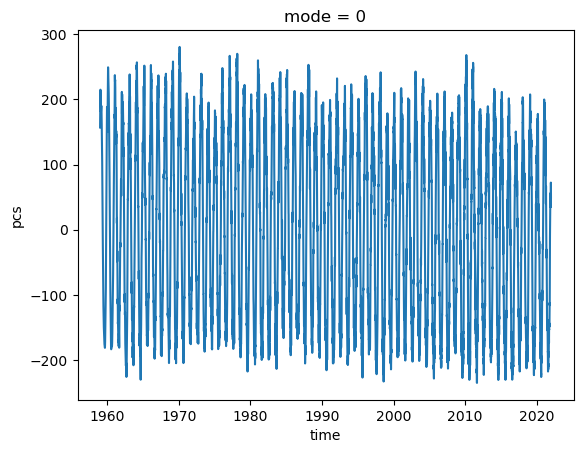

In [40]:
pc.isel(mode=0).plot();

In [41]:
pc.isel(mode=0).mean()

<xarray.DataArray 'pcs' ()> Size: 4B
array(3.427815e-07, dtype=float32)
Coordinates:
    mode     int64 8B 0